In [76]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

In [77]:
heart_disease <- read_csv("https://raw.githubusercontent.com/maggie63/dsci-100-group-34/main/data/heart.csv") |>
    select("age", "sex", "trestbps", "chol", "target", "thalach") |>
    mutate(target = as_factor(target))
heart_sex <- select(heart_disease, "sex") |>
    mutate(sex = as_factor(sex))  |>
    pull(sex)
heart_recipe <- recipe(target ~ age + trestbps + chol + thalach, data = heart_disease) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())
heart_scaled <- heart_recipe |>  
                        prep() |> 
                        bake(heart_disease) |>
                        mutate(sex = heart_sex)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [78]:
heart_split <- initial_split(heart_scaled, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

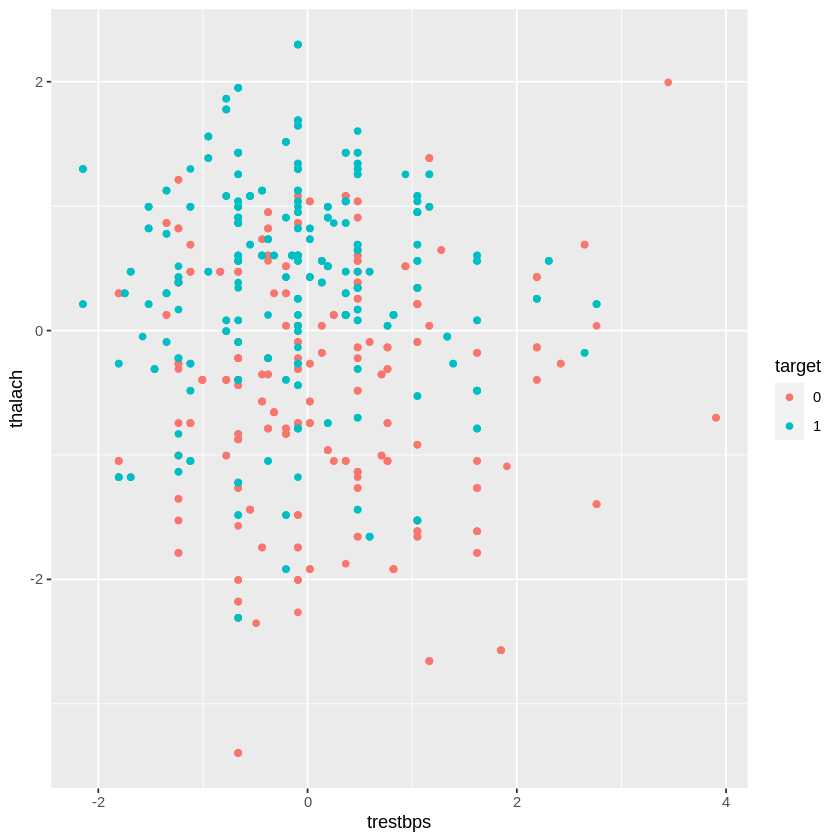

In [79]:
heart_plot <- heart_training |>
    ggplot(aes(x = trestbps, y = thalach, colour = target)) +
    geom_point() +
    labs()
heart_plot